# TensorFlow Lite Image Classification

In [50]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="mobilenet_v1_1.0_224_quant.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


[{'name': 'input',
  'index': 88,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.0078125, 128),
  'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
   'zero_points': array([128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [53]:
print(Image.__version__)

10.3.0


In [31]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'MobilenetV1/Predictions/Reshape_1',
  'index': 87,
  'shape': array([   1, 1001], dtype=int32),
  'shape_signature': array([   1, 1001], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.00390625, 0),
  'quantization_parameters': {'scales': array([0.00390625], dtype=float32),
   'zero_points': array([0], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [32]:
from PIL import Image

# im = Image.open("animal.jpg")
im = Image.open("animal.jpg")
# im = Image.open("banana.jpg")

(1600, 900)


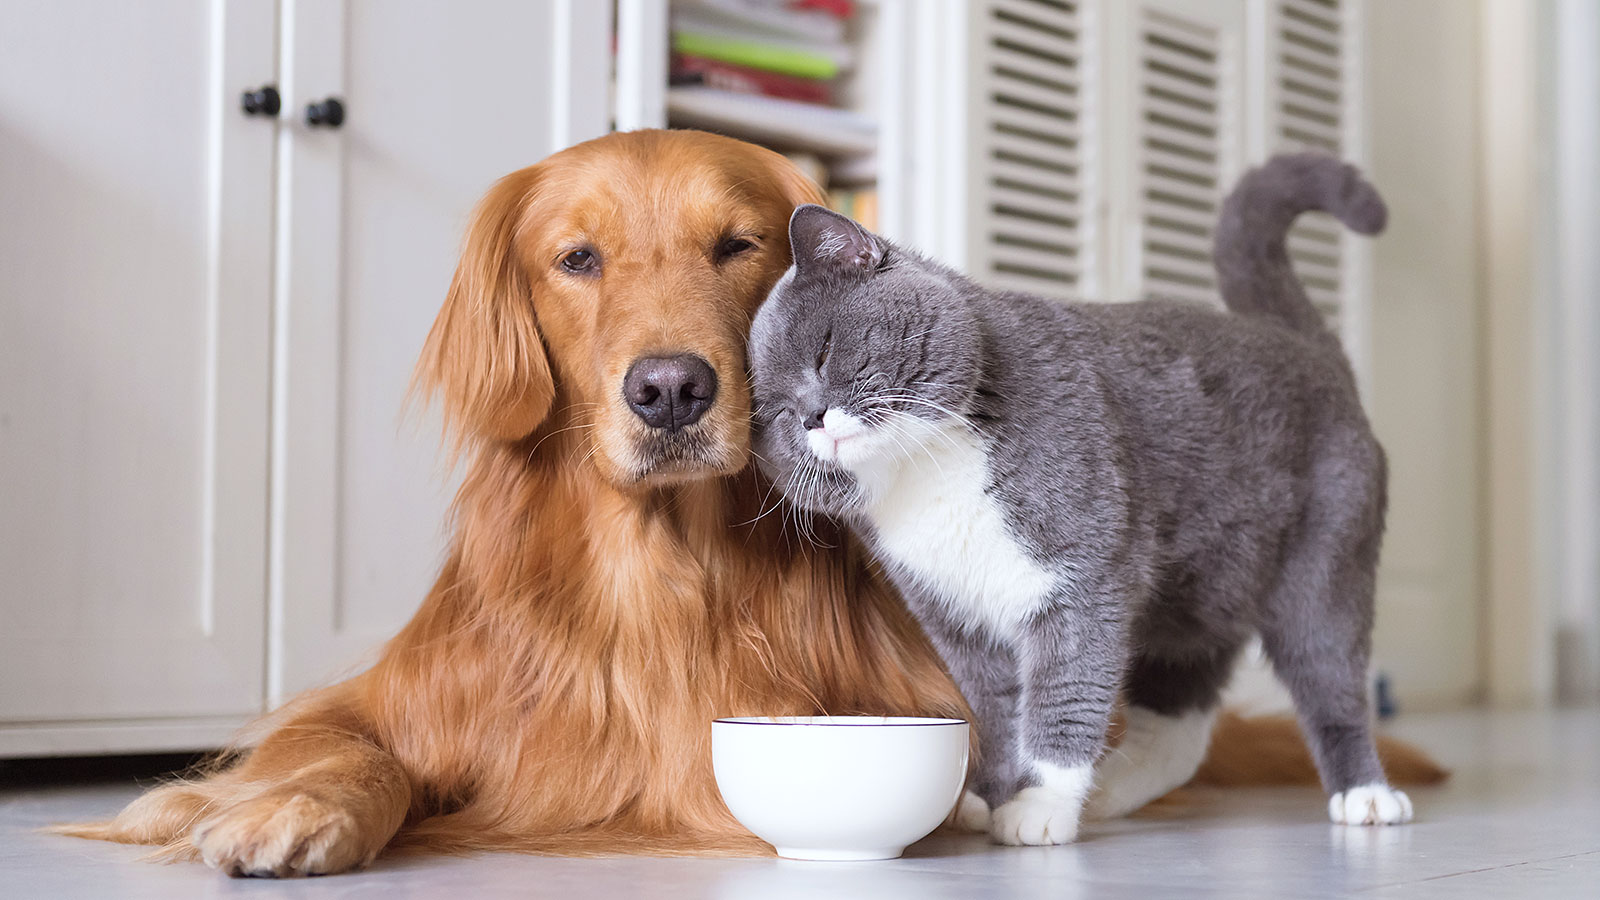

In [33]:
print(im.size)
im

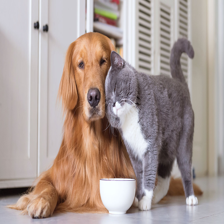

In [34]:
res_im = im.resize((224, 224))
res_im

In [35]:
np_res_im = np.array(res_im)
np_res_im = (np_res_im).astype('uint8')
np_res_im

array([[[208, 207, 215],
        [208, 207, 215],
        [209, 208, 216],
        ...,
        [212, 214, 219],
        [205, 208, 215],
        [196, 201, 205]],

       [[208, 207, 215],
        [208, 207, 215],
        [209, 208, 216],
        ...,
        [212, 214, 219],
        [205, 208, 215],
        [196, 201, 205]],

       [[208, 207, 215],
        [208, 207, 215],
        [208, 207, 215],
        ...,
        [212, 213, 221],
        [205, 207, 215],
        [196, 201, 204]],

       ...,

       [[180, 180, 192],
        [181, 181, 193],
        [182, 182, 194],
        ...,
        [192, 194, 203],
        [193, 193, 202],
        [190, 193, 201]],

       [[182, 182, 194],
        [182, 182, 194],
        [183, 183, 195],
        ...,
        [191, 193, 203],
        [192, 192, 201],
        [189, 192, 200]],

       [[182, 182, 194],
        [182, 182, 194],
        [183, 183, 195],
        ...,
        [192, 195, 204],
        [194, 194, 203],
        [191, 193, 202]]

In [36]:
input_details[0]['shape']

array([  1, 224, 224,   3], dtype=int32)

In [37]:
np_res_im.shape

(224, 224, 3)

In [38]:
if len(np_res_im.shape) == 3:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])


In [39]:
output_data.shape

(1, 1001)

In [40]:
output_data[0].shape

(1001,)

In [41]:
classification_prob = []
classification_label = []
total = 0
for index,prob in enumerate(output_data[0]):
    if prob != 0:
        classification_prob.append(prob)
        total += prob
        classification_label.append(index)

In [42]:
label_names = [line.rstrip('\n') for line in open("labels_mobilenet_quant_v1_224.txt")]
label_names

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

In [43]:
found_labels = np.array(label_names)[classification_label]

In [44]:
import pandas as pd

df = pd.DataFrame(classification_prob/total, found_labels)
sorted_df = df.sort_values(by=0,ascending=False)
sorted_df

,0
bloodhound,0.108225
standard poodle,0.108225
golden retriever,0.077922
redbone,0.077922
space heater,0.056277
...,...
vacuum,0.004329
water bottle,0.004329
washer,0.004329
web site,0.004329
